#Importing Library

In [ ]:
import torch
import torch.nn as nn
import torch
import torchvision.transforms as transforms
from PIL import Image
import os
import random
import numpy as np
import copy
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Loading Pretrained Model

In [ ]:
class Encoder(nn.Module):
    """
    the encoder network
    """
    def __init__(self):
        super(Encoder, self).__init__()
        # first block
        self.conv_1_1 = nn.Conv2d(3, 3, 1, 1, 0)
        self.reflecPad_1_1 = nn.ReflectionPad2d((1, 1, 1, 1))

        self.conv_1_2 = nn.Conv2d(3, 64, 3, 1, 0)
        self.relu_1_2 = nn.ReLU(inplace=True)

        self.reflecPad_1_3 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_1_3 = nn.Conv2d(64, 64, 3, 1, 0)
        self.relu_1_3 = nn.ReLU(inplace=True)

        self.maxPool_1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # second block
        self.reflecPad_2_1 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_2_1 = nn.Conv2d(64, 128, 3, 1, 0)
        self.relu_2_1 = nn.ReLU(inplace=True)

        self.reflecPad_2_2 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_2_2 = nn.Conv2d(128, 128, 3, 1, 0)
        self.relu_2_2 = nn.ReLU(inplace=True)

        self.maxPool_2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # third block
        self.reflecPad_3_1 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_3_1 = nn.Conv2d(128, 256, 3, 1, 0)
        self.relu_3_1 = nn.ReLU(inplace=True)

        self.reflecPad_3_2 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_3_2 = nn.Conv2d(256, 256, 3, 1, 0)
        self.relu_3_2 = nn.ReLU(inplace=True)

        self.reflecPad_3_3 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_3_3 = nn.Conv2d(256, 256, 3, 1, 0)
        self.relu_3_3 = nn.ReLU(inplace=True)

        self.reflecPad_3_4 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_3_4 = nn.Conv2d(256, 256, 3, 1, 0)
        self.relu_3_4 = nn.ReLU(inplace=True)

        self.maxPool_3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # fourth block
        self.reflecPad_4_1 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_4_1 = nn.Conv2d(256, 512, 3, 1, 0)
        self.relu_4_1 = nn.ReLU(inplace=True)

    def forward(self, input):
        output = {}

        # first block
        out = self.conv_1_1(input)
        out = self.reflecPad_1_1(out)
        out = self.conv_1_2(out)
        out = self.relu_1_2(out)

        output['r11'] = out

        out = self.reflecPad_1_3(out)
        out = self.conv_1_3(out)
        out = self.relu_1_3(out)

        out = self.maxPool_1(out)

        # second block
        out = self.reflecPad_2_1(out)
        out = self.conv_2_1(out)
        out = self.relu_2_1(out)

        output['r21'] = out

        out = self.reflecPad_2_2(out)
        out = self.conv_2_2(out)
        out = self.relu_2_2(out)

        out = self.maxPool_2(out)

        # third block
        out = self.reflecPad_3_1(out)
        out = self.conv_3_1(out)
        out = self.relu_3_1(out)

        output['r31'] = out

        out = self.reflecPad_3_2(out)
        out = self.conv_3_2(out)
        out = self.relu_3_2(out)

        out = self.reflecPad_3_3(out)
        out = self.conv_3_3(out)
        out = self.relu_3_3(out)

        out = self.reflecPad_3_4(out)
        out = self.conv_3_4(out)
        out = self.relu_3_4(out)

        out = self.maxPool_3(out)

        # fourth block
        out = self.reflecPad_4_1(out)
        out = self.conv_4_1(out)
        out = self.relu_4_1(out)

        output['r41'] = out

        return output
encoder_arch = Encoder()
encoder_arch.load_state_dict(torch.load('/content/drive/MyDrive/encoder_1_25_6_state_dict.pth'))

<All keys matched successfully>

In [ ]:
class Decoder(nn.Module):
    """
    the decoder network
    """
    def __init__(self):
        super(Decoder, self).__init__()
        # first block
        self.reflecPad_1_1 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_1_1 = nn.Conv2d(512, 256, 3, 1, 0)
        self.relu_1_1 = nn.ReLU(inplace=True)

        self.unpool_1 = nn.UpsamplingNearest2d(scale_factor=2)

        # second block
        self.reflecPad_2_1 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_2_1 = nn.Conv2d(256, 256, 3, 1, 0)
        self.relu_2_1 = nn.ReLU(inplace=True)

        self.reflecPad_2_2 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_2_2 = nn.Conv2d(256, 256, 3, 1, 0)
        self.relu_2_2 = nn.ReLU(inplace=True)

        self.reflecPad_2_3 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_2_3 = nn.Conv2d(256, 256, 3, 1, 0)
        self.relu_2_3 = nn.ReLU(inplace=True)

        self.reflecPad_2_4 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_2_4 = nn.Conv2d(256, 128, 3, 1, 0)
        self.relu_2_4 = nn.ReLU(inplace=True)

        self.unpool_2 = nn.UpsamplingNearest2d(scale_factor=2)

        # third block
        self.reflecPad_3_1 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_3_1 = nn.Conv2d(128, 128, 3, 1, 0)
        self.relu_3_1 = nn.ReLU(inplace=True)

        self.reflecPad_3_2 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_3_2 = nn.Conv2d(128, 64, 3, 1, 0)
        self.relu_3_2 = nn.ReLU(inplace=True)

        self.unpool_3 = nn.UpsamplingNearest2d(scale_factor=2)

        # fourth block
        self.reflecPad_4_1 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_4_1 = nn.Conv2d(64, 64, 3, 1, 0)
        self.relu_4_1 = nn.ReLU(inplace=True)

        self.reflecPad_4_2 = nn.ReflectionPad2d((1, 1, 1, 1))
        self.conv_4_2 = nn.Conv2d(64, 3, 3, 1, 0)

    def forward(self, input):
        # first block
        out = self.reflecPad_1_1(input)
        out = self.conv_1_1(out)
        out = self.relu_1_1(out)
        out = self.unpool_1(out)

        # second block
        out = self.reflecPad_2_1(out)
        out = self.conv_2_1(out)
        out = self.relu_2_1(out)
        out = self.reflecPad_2_2(out)
        out = self.conv_2_2(out)
        out = self.relu_2_2(out)
        out = self.reflecPad_2_3(out)
        out = self.conv_2_3(out)
        out = self.relu_2_3(out)
        out = self.reflecPad_2_4(out)
        out = self.conv_2_4(out)
        out = self.relu_2_4(out)
        out = self.unpool_2(out)

        # third block
        out = self.reflecPad_3_1(out)
        out = self.conv_3_1(out)
        out = self.relu_3_1(out)
        out = self.reflecPad_3_2(out)
        out = self.conv_3_2(out)
        out = self.relu_3_2(out)
        out = self.unpool_3(out)

        # fourth block
        out = self.reflecPad_4_1(out)
        out = self.conv_4_1(out)
        out = self.relu_4_1(out)
        out = self.reflecPad_4_2(out)
        out = self.conv_4_2(out)

        return out
decoder_arch = Decoder()
decoder_arch.load_state_dict(torch.load('/content/drive/MyDrive/decoder_1_50_state_dict.pth'))

<All keys matched successfully>

In [ ]:

# Define the transformation for preprocessing the image
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to match the input size of the encoder
    transforms.ToTensor(),  # Convert the image to a tensor
])

In [ ]:
# Function to encode an image
def encode_image(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        encoding = encoder_arch(image)
    return encoding

#1st Feature Space

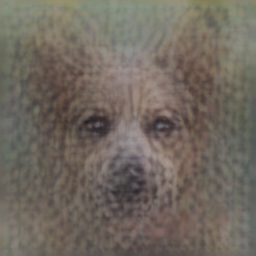

In [ ]:




# Select 100 random images
image_folder = '/content/drive/MyDrive/dog_face_dataset'
image_files = os.listdir(image_folder)
random.shuffle(image_files)
selected_files = image_files[:100]

# Encode the selected images
encodings = []
for image_file in selected_files:
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path).convert('RGB')
    encoding = encode_image(image)
    encodings.append(encoding)

# Generate 100 random numbers whose sum is 1
random_numbers = np.random.dirichlet(np.ones(100), size=1)

# Print the generated random numbers and their sum
random_numbers = random_numbers[0]
for i in range(100):
  encodings[i] = random_numbers[i]*encodings[i]['r41']

sum_encoding = torch.stack(encodings).sum(dim=0)
# Decode the sum encoding
with torch.no_grad():
    output = decoder_arch(sum_encoding)

# Convert the output tensor to an image
output = output.squeeze(0).cpu()
output_image = transforms.ToPILImage()(output)

# Save the decoded image
output_image.save('decoded_sum_image.jpg')
output_image

#2nd Feature Space

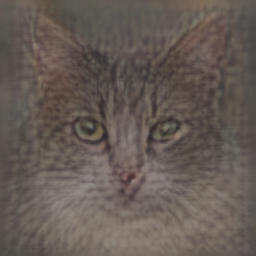

In [ ]:
# Select 100 random images
image_folder = '/content/drive/MyDrive/cat_face_images'
image_files = os.listdir(image_folder)
random.shuffle(image_files)
selected_files = image_files[:100]

# Encode the selected images
encodings = []
for image_file in selected_files:
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path).convert('RGB')
    encoding = encode_image(image)
    encodings.append(encoding)


# Generate 100 random numbers whose sum is 1
random_numbers = np.random.dirichlet(np.ones(100), size=1)

# Print the generated random numbers and their sum
random_numbers = random_numbers[0]
for i in range(100):
  encodings[i] = random_numbers[i]*encodings[i]['r41']


# Add the encodings
sum_encoding_two = torch.stack(encodings).sum(dim=0)
# Decode the sum encoding
with torch.no_grad():
    output = decoder_arch(sum_encoding_two)

# Convert the output tensor to an image
output = output.squeeze(0).cpu()
output_image = transforms.ToPILImage()(output)

# Save the decoded image
output_image.save('decoded_sum_image.jpg')
output_image

#Performing Transformation

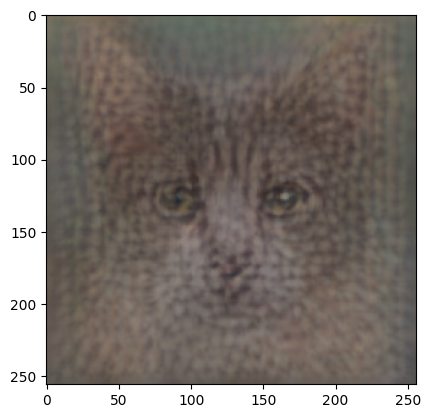

In [ ]:

# laatentspace1 = sum_encoding[0]
copy_latenspace = copy.deepcopy(sum_encoding)
copy_latenspace[0][:280] = sum_encoding_two[0][:280]
with torch.no_grad():
    transformed_output = decoder_arch(copy_latenspace)

transformed_output = transformed_output.squeeze(0).cpu()
transformed_output_tensor = transforms.ToPILImage()(transformed_output)
plt.imshow(transformed_output_tensor)
plt.show()